<a href="https://colab.research.google.com/github/CaBlaze/Quimicag3/blob/main/Cinetica_Quimica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install rdkit
! pip install pyscf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 52.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 MB 17.3 MB/s eta 0:00:00


#Creating structures from SMILES

Molecules can be represented as strings with SMILES. Simplified molecular-input line-entry system (SMILES) is a string based representation of a molecule. (https://en.wikipedia.org/wiki/Simplified_molecular-input_line-entry_system) For example n-butane is represented as CCCC. Interactive RDKit demo for SMILES is available at https://rdkit.org/temp/demo/demo.html

If you want to draw a 2D structure of molecule and obtain the SMILES representation, use this link https://pubchem.ncbi.nlm.nih.gov//edit3/index.html

In [2]:
# import these definitions
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.drawOptions.addAtomIndices = True

#Let us see how to visualize the 2D structure of toluene using SMILES

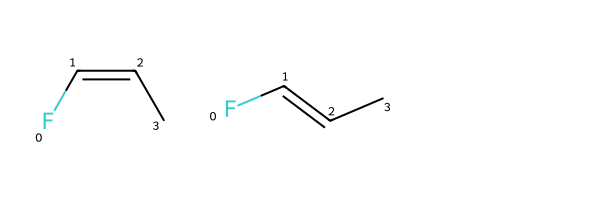

In [3]:
# set SMILES for toluene
smiles1 = "F\C=C/C"
smiles2 = "F/C=C/C"
# Convert to RDKit molecule
mol1 = Chem.MolFromSmiles(smiles1)
mol2 = Chem.MolFromSmiles(smiles2)
# Draw the strucutre
Draw.MolsToGridImage([mol1,mol2])

The structure generated has implicit hydrogen atoms. We will need explicit hydrogen atoms to generate the input structure

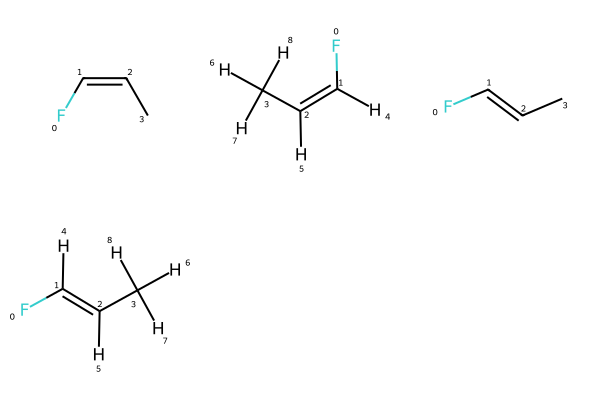

In [4]:
# Add hydrogens
mol1_h = Chem.AddHs(mol1)
mol2_h = Chem.AddHs(mol2)
# Display both structures
Draw.MolsToGridImage([mol1, mol1_h,mol2, mol2_h], subImgSize=(200,200))

The input to a quantum chemistry calculation is a 3D structure. Adding x,y,z coordinates to each atom generates a conformer. The section below generates one confomer.

In [5]:
# The current molecule has z = 0 for all atoms

# This is a 2D molecule
print(Chem.MolToMolBlock(mol1_h))
print(Chem.MolToMolBlock(mol2_h))


     RDKit          2D

  9  8  0  0  0  0  0  0  0  0999 V2000
   -0.7500   -1.2990    0.0000 F   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.2500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500    1.2990    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
    2.2500    1.2990    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
    3.0000   -2.5981    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
    3.5490   -0.5490    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
    0.9510   -2.0490    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  2  0
  3  4  1  0
  2  5  1  0
  3  6  1  0
  4  7  1  0
  4  8  1  0
  4  9  1  0
M  END


     RDKit          2D

  9  8  0  0  0  0  0  0  0  0999 V2000
   -0.7500   -1.2990    0.0000 F   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0 

In [6]:
# Let us make it 3D by generating a random conformer
# Hacmeos que la Molecula esta en 3D
Chem.AllChem.EmbedMolecule(mol1_h)
Chem.AllChem.EmbedMolecule(mol2_h)
# Verificamos que este en 3D
# look at the molecule again
print(Chem.MolToMolBlock(mol1_h))
print(Chem.MolToMolBlock(mol2_h))


     RDKit          3D

  9  8  0  0  0  0  0  0  0  0999 V2000
    1.1808    1.5005    0.5321 F   0  0  0  0  0  0  0  0  0  0  0  0
    1.2955    0.2366    0.0442 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.2498   -0.5351   -0.2253 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.1141    0.0312    0.0267 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.2866   -0.2066   -0.1511 H   0  0  0  0  0  0  0  0  0  0  0  0
    0.3984   -1.5377   -0.6138 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.8891   -0.4676   -0.6070 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.3164   -0.1516    1.1146 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.0915    1.1301   -0.1204 H   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  2  0
  3  4  1  0
  2  5  1  0
  3  6  1  0
  4  7  1  0
  4  8  1  0
  4  9  1  0
M  END


     RDKit          3D

  9  8  0  0  0  0  0  0  0  0999 V2000
    2.5486   -0.1067    0.1969 F   0  0  0  0  0  0  0  0  0  0  0  0
    1.3076    0.2723   -0.1597 C   0  0  0  0  0  0  0  0 

In [7]:
# Save the molecule in XYZ format for future use
#Guardamos la Info 3d en un archivo
Chem.MolToXYZFile(mol1_h,"mol1.xyz")
Chem.MolToXYZFile(mol1_h,"mol2.xyz")

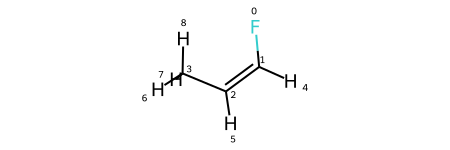

In [8]:
mol1_h

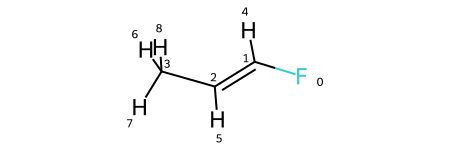

In [9]:
mol2_h

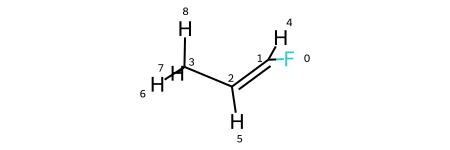

In [10]:
# set the value to 90 for the conformer
Chem.AllChem.SetDihedralDeg(mol1_h.GetConformer(0),3,2,1,0,90.0)

# save the new conformer
#Estado de Transición
Chem.MolToXYZFile(mol1_h, "moltran.xyz")

# Looks like it is set to 90
mol1_h


In [11]:
# import the package
from pyscf import gto, scf

In [12]:
mol1 = gto.M(atom="mol1.xyz")

In [13]:
mol1.basis = "3-21G"

mf = mol1.KS()
mf.xc = 'b3lyp'

mf.kernel()

/usr/local/lib/python3.10/dist-packages/pyscf/dft/libxc.py:771: UserWarning: Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, corresponding to the original definition by Stephens et al. (issue 1480) and the same as the B3LYP functional in Gaussian. To restore the VWN5 definition, you can put the setting "B3LYP_WITH_VWN5 = True" in pyscf_conf.py
  warnings.warn('Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, '


converged SCF energy = -214.251651928337


-214.2516519283373

In [14]:
moltran = gto.M(atom="moltran.xyz")

In [15]:
moltran.basis = "3-21G"

mft = moltran.KS()
mft.xc = 'b3lyp'

mft.kernel()

converged SCF energy = -214.087978179134


-214.0879781791345

In [16]:
mol2 = gto.M(atom="mol2.xyz")

In [17]:
mol2.basis = "3-21G"

mf2 = mol2.KS()
mf2.xc = 'b3lyp'

mf2.kernel()

converged SCF energy = -214.251651928338


-214.2516519283376

In [18]:
! pip install git+https://github.com/giacomomarchioro/PyEnergyDiagrams

import matplotlib.pyplot as plt
from energydiagram import ED

  Cloning https://github.com/giacomomarchioro/PyEnergyDiagrams to /tmp/pip-req-build-rx6lpjxg
  Running command git clone --filter=blob:none --quiet https://github.com/giacomomarchioro/PyEnergyDiagrams /tmp/pip-req-build-rx6lpjxg
  Resolved https://github.com/giacomomarchioro/PyEnergyDiagrams to commit 3d6086564aa99aa0a0f3db4a510b736015562d5c
  Preparing metadata (setup.py) ... done
  Created wheel for energydiagram: filename=energydiagram-0.2.0-py3-none-any.whl size=9466 sha256=7b57fe73ecf401c8c1972c9a8fca4e9a7b4ebfbc582aa3d3f00b13ba6508f3e5
  Stored in directory: /tmp/pip-ephem-wheel-cache-6dzsgkdb/wheels/fd/36/8c/10ed87cd41f9638b1e3a44dabe7e1e185131d967ea6ed395cf
Successfully built energydiagram


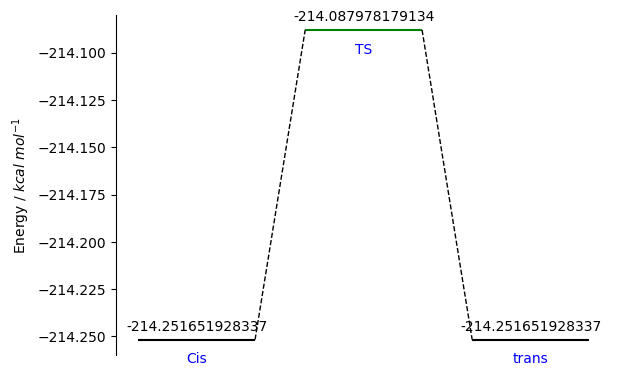

In [19]:
diagram = ED()
diagram.add_level(-214.251651928337,'Cis')
diagram.add_level(-214.087978179134,'TS',color='g')
diagram.add_level(-214.251651928337,'trans')

diagram.add_link(0,1)
diagram.add_link(1,2)
diagram.plot(ylabel="Energy / $kcal$ $mol^{-1}$") # this is the default ylabel